In [54]:
import numpy as np
import pandas as pd
from glob import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv ('./dataset/HandInfo.csv')

In [3]:
files = glob('./dataset/Hands/*.jpg')
list_images = []
img_size = 256

for file in files:
    path_file = file.replace("\\","/");
    filename = path_file.split("/")[3]
    img = cv2.cvtColor(cv2.imread(path_file), cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img, (img_size, img_size))
    list_images.append([resized_img, df[df['imageName'] == filename].filter(items = ['gender']).values[0][0]])
    

In [4]:
random.shuffle(list_images)
data = np.array(list_images)

C:\Users\danie\AppData\Local\Temp/ipykernel_7772/3997491373.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(list_images)


C:\Users\danie\Programas\miniconda3\envs\img\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Dataset')

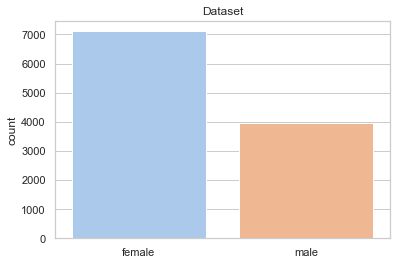

In [5]:
classes = []
m = 0
f = 0
for i in data:
    if(i[1] == 'male'):
        classes.append("male")
        m = m + 1
    else:
        classes.append("female")
        f = f + 1
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(classes).set_title("Dataset")

In [6]:
print("Male {} | Female {}".format(m,f))

Male 3967 | Female 7109


### Balanceamento

In [7]:
drop_index = []
for index, c in enumerate(classes):
    if (c == 'female') and (m * 1.1 < f):
        drop_index.append(index)
        f -= 1  

In [8]:
data_bal = np.delete(data, drop_index, axis=0)
classes_bal = np.delete(np.array(classes), drop_index, axis=0)

In [9]:
print("Male {} | Female {}".format(m,f))

Male 3967 | Female 4363


Text(0.5, 1.0, 'female')

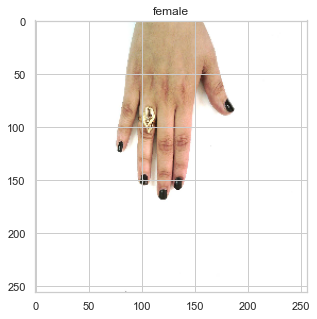

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(data[0][0])
plt.title(data[0][1])

In [11]:
# Female = 4363
# Male   = 3967
# Total  = 8330
# Train  = 6247(F - 3272 | M - 2975)
# Test   = 2083(F - 1091 | M - 992)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data_bal, classes_bal, train_size=0.8, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, shuffle=True)

In [35]:
len(x_train), len(x_test), len(y_train), len(y_test)

(5997, 1666, 5997, 1666)

C:\Users\danie\Programas\miniconda3\envs\img\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\danie\Programas\miniconda3\envs\img\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\danie\AppData\Local\Temp/ipykernel_7772/3384982516.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


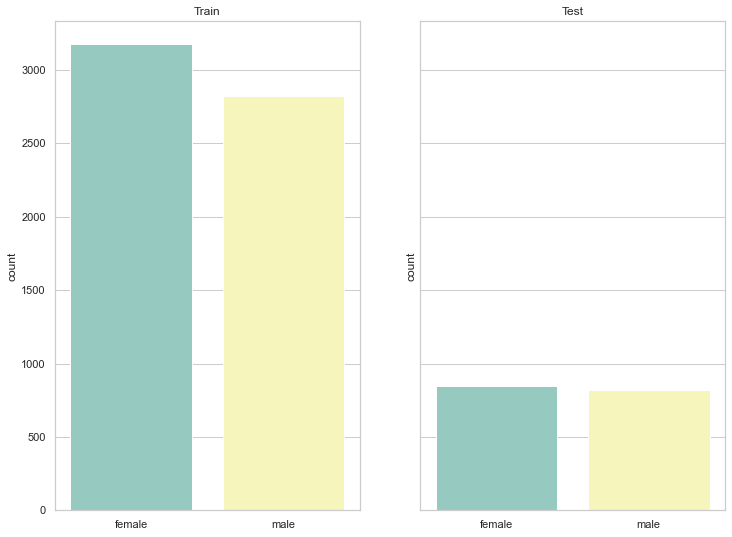

In [36]:
fig, ax =plt.subplots(1,2, sharey=True)
sns.set(rc={'figure.figsize':(12,9)})

sns.set_theme(style="whitegrid", palette="Set3")
sns.countplot(y_train, ax=ax[0]).set_title("Train")

sns.set_theme(style="whitegrid", palette="Set3")
sns.countplot(y_test, ax=ax[1]).set_title("Test")
fig.show()

### Normalização

In [38]:
x_train = np.array([x[0] for x in x_train]) / 255
x_test = np.array([x[0] for x in x_test]) / 255
x_val = np.array([x[0] for x in x_val]) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

### Modelagem

In [55]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

opt = Adam(lr=0.0001)
model.compile(optimizer=opt , loss='sparse_categorical_crossentropy', metrics='accuracy')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 57600)            

In [49]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

opt = Adam(lr=0.0001)
model.compile(optimizer=opt , loss='mse', metrics='accuracy')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)       

In [64]:
for i in x_train:
    if type(i) == str:
        print(i)
        break

In [65]:
x_train.d

5997

In [56]:
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_val, y_val))

Epoch 1/500


UnimplementedError:  Cast string to float is not supported
	 [[node sparse_categorical_crossentropy/Cast (defined at \AppData\Local\Temp/ipykernel_7772/3666646011.py:1) ]] [Op:__inference_train_function_3827]

Function call stack:
train_function


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Male','Female']))